# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-06-05 10:23:02--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  30.7MB/s    in 1.1s    

2023-06-05 10:23:05 (30.7 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

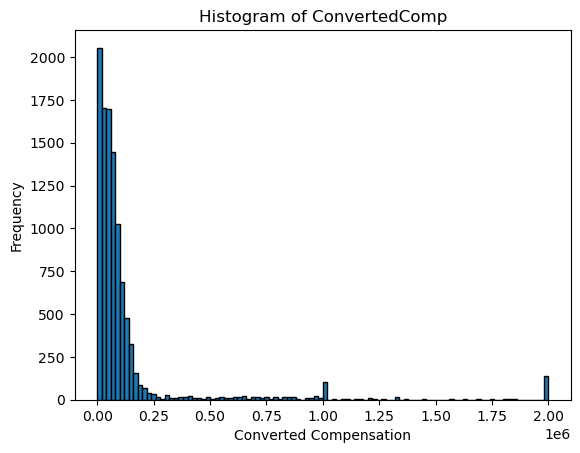

In [12]:
QUERY = """
SELECT ConvertedComp
FROM master

"""
df = pd.read_sql_query(QUERY,conn)
plt.hist(df['ConvertedComp'], bins=100, edgecolor='k')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of ConvertedComp')
plt.show()

### Box Plots


Plot a box plot of `Age.`


        Age
0      22.0
1      23.0
2      28.0
3      26.0
4      29.0
...     ...
11393  36.0
11394  25.0
11395  34.0
11396  25.0
11397  30.0

[11398 rows x 1 columns]


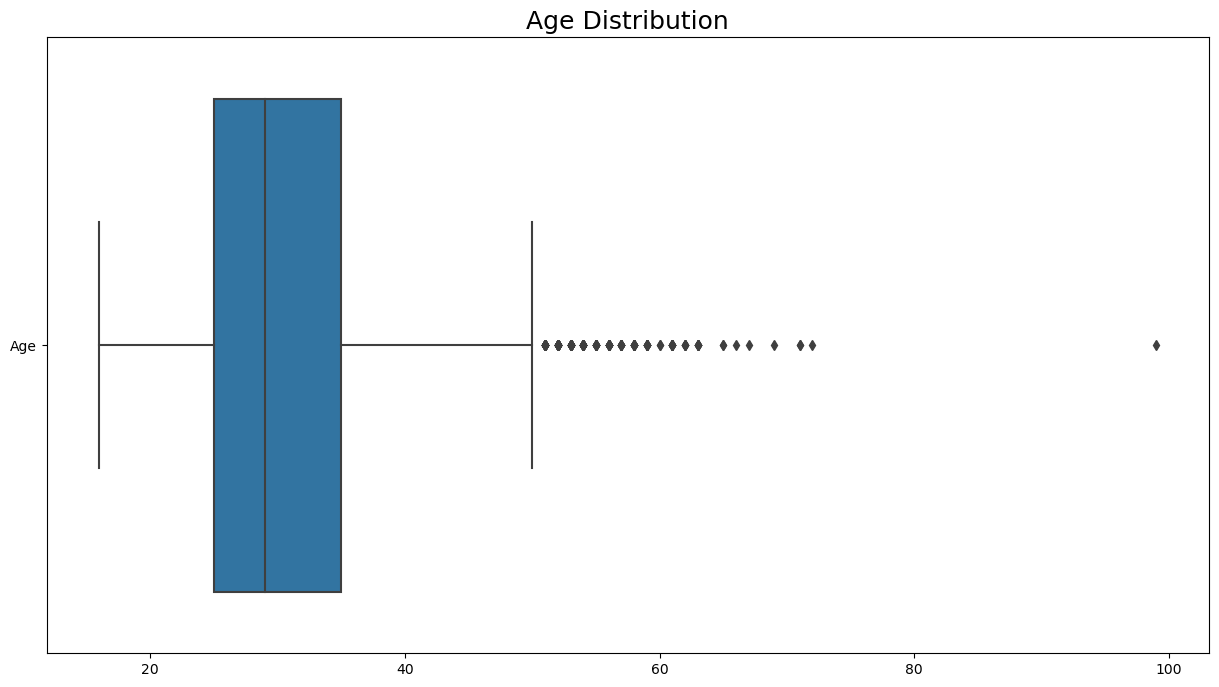

In [20]:
QUERY = """
SELECT Age
FROM master

"""
df = pd.read_sql_query(QUERY,conn)

print(df)
plt.rcParams['figure.figsize'] = [15,8]

ax = sns.boxplot(data = df, orient = 'h')
ax.set_title('Age Distribution', size = 18)

plt.show()

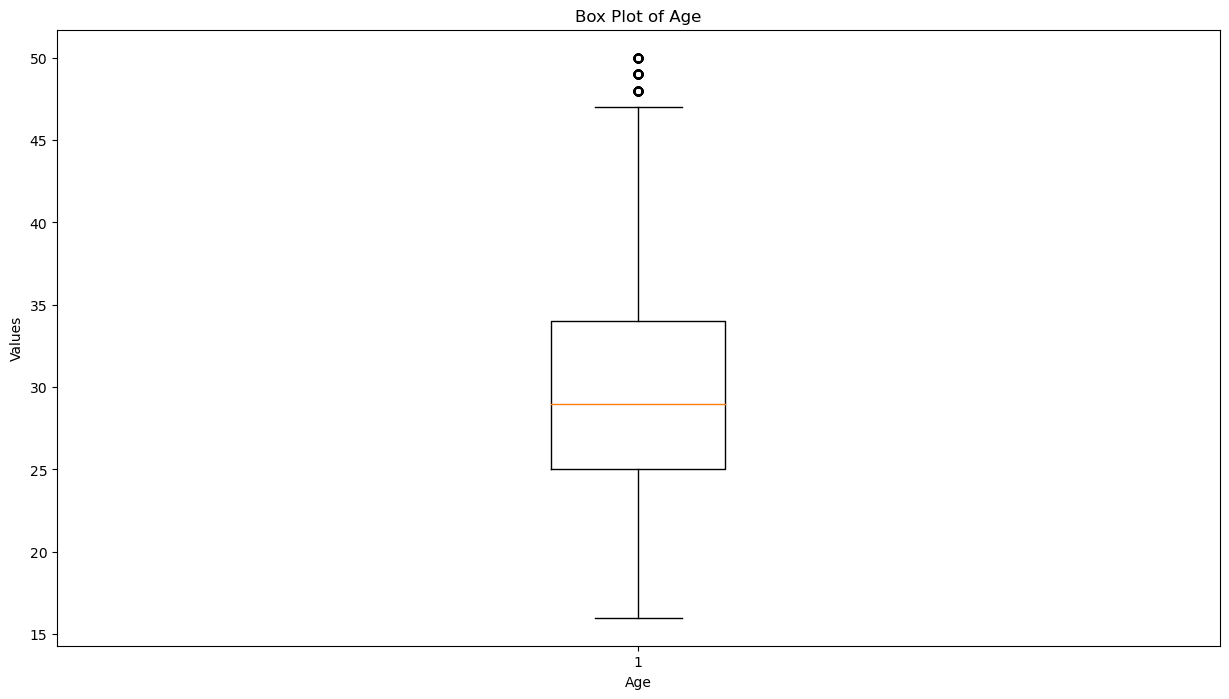

In [21]:
df_cleaned = df.dropna(subset=['Age'])

# Remove outliers using the interquartile range (IQR) method
Q1 = df_cleaned['Age'].quantile(0.25)
Q3 = df_cleaned['Age'].quantile(0.75)
IQR = Q3 - Q1
age_filtered = df_cleaned[(df_cleaned['Age'] >= Q1 - 1.5 * IQR) & (df_cleaned['Age'] <= Q3 + 1.5 * IQR)]

# Plot the box plot of the 'Age' column
plt.boxplot(age_filtered['Age'])
plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Box Plot of Age')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


        Age  WorkWeekHrs
0      22.0         80.0
1      23.0         32.0
2      28.0         40.0
3      26.0         40.0
4      29.0         45.0
...     ...          ...
11393  36.0         40.0
11394  25.0         40.0
11395  34.0         40.0
11396  25.0         42.5
11397  30.0         80.0

[11398 rows x 2 columns]


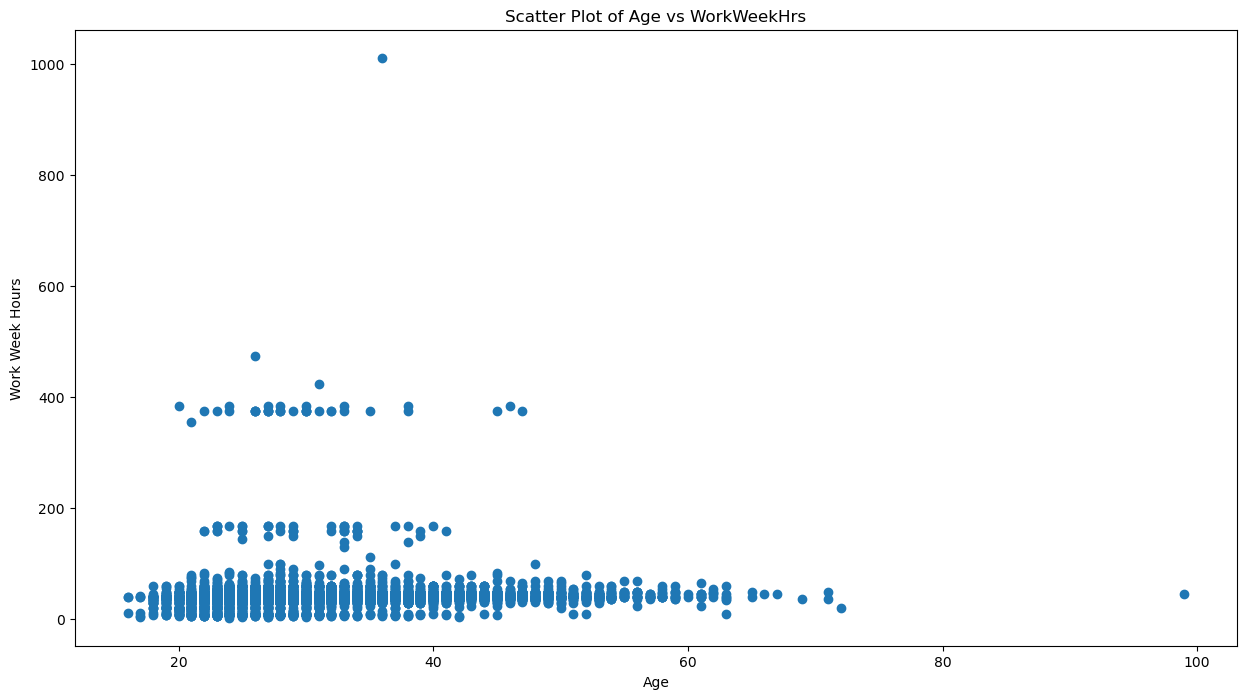

In [22]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master

"""
df = pd.read_sql_query(QUERY,conn)
print(df)

plt.scatter(df['Age'], df['WorkWeekHrs'])
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.title('Scatter Plot of Age vs WorkWeekHrs')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


        Age  WorkWeekHrs  CodeRevHrs
0      22.0         80.0         NaN
1      23.0         32.0        12.0
2      28.0         40.0         5.0
3      26.0         40.0         NaN
4      29.0         45.0         5.0
...     ...          ...         ...
11393  36.0         40.0         NaN
11394  25.0         40.0         5.0
11395  34.0         40.0         5.0
11396  25.0         42.5         2.0
11397  30.0         80.0         1.0

[11398 rows x 3 columns]


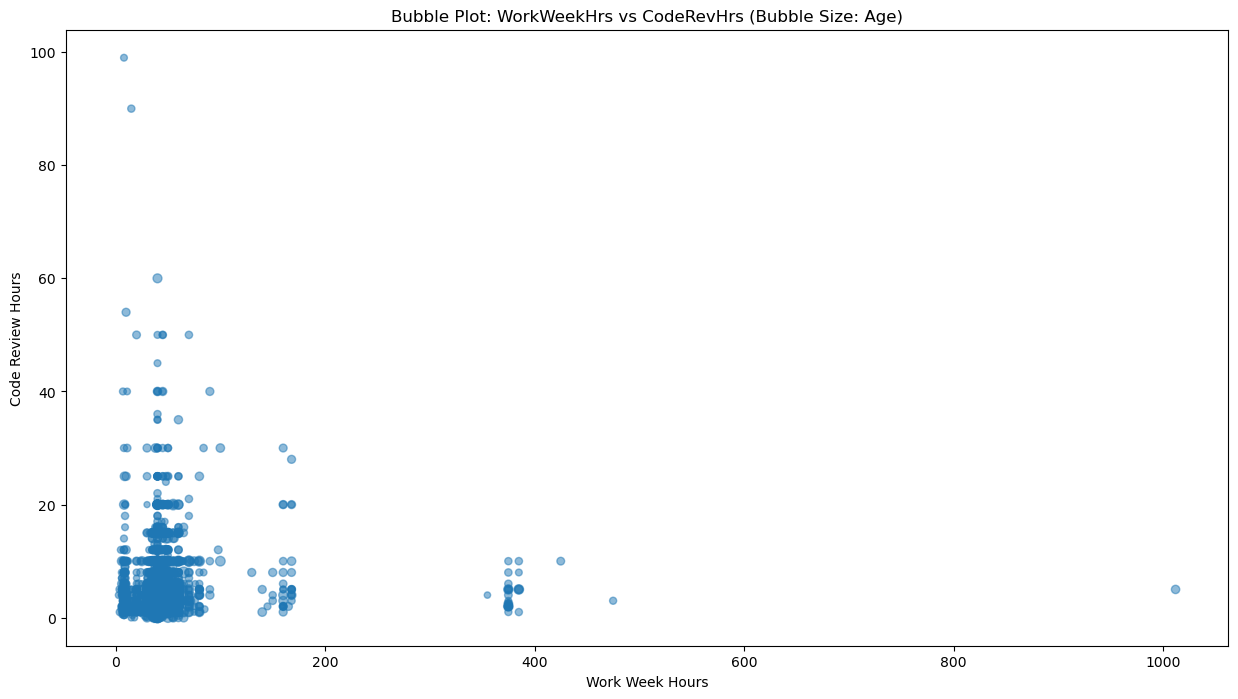

In [23]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master

"""
df = pd.read_sql_query(QUERY,conn)

print(df)

plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], s=df['Age'], alpha=0.5)
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')
plt.title('Bubble Plot: WorkWeekHrs vs CodeRevHrs (Bubble Size: Age)')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


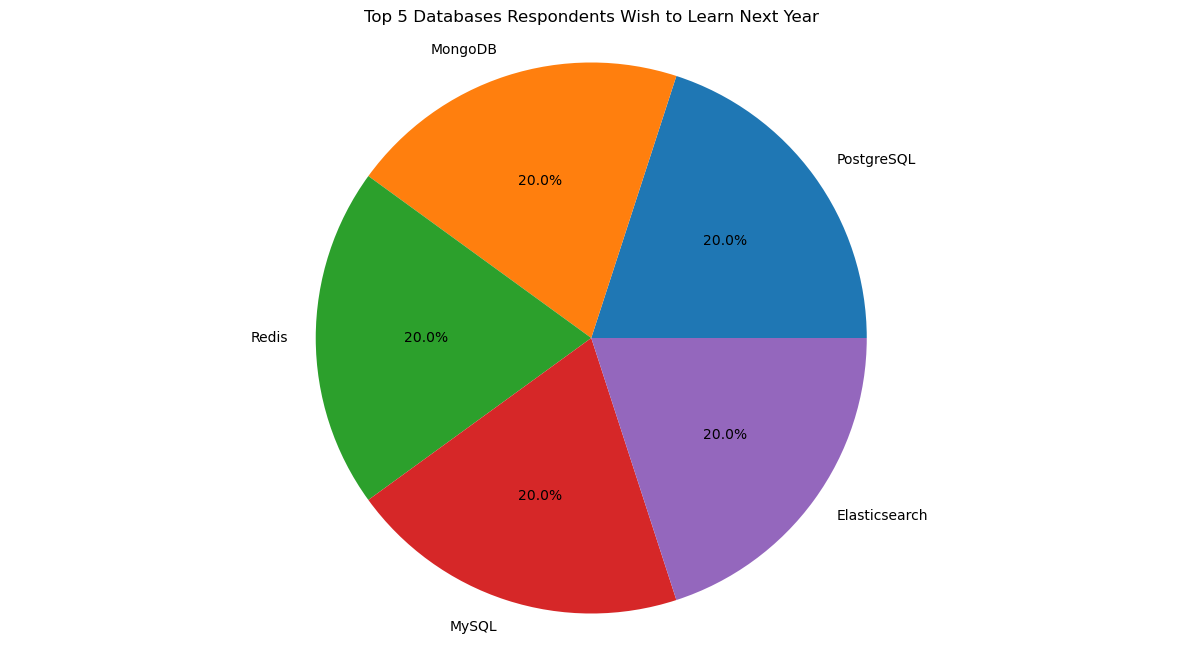

In [26]:
QUERY = """
SELECT *, COUNT(*) AS count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY count DESC
LIMIT 5

"""
df = pd.read_sql_query(QUERY,conn)

database_counts = df['DatabaseDesireNextYear'].value_counts()

# Select the top 5 databases
top_databases = database_counts.head(5).index.tolist()

# Calculate the percentages for each database
database_percentages = [(database_counts[db] / database_counts.sum()) * 100 for db in top_databases]

# Create the pie chart
plt.pie(database_percentages, labels=top_databases, autopct='%1.1f%%')
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.axis('equal')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


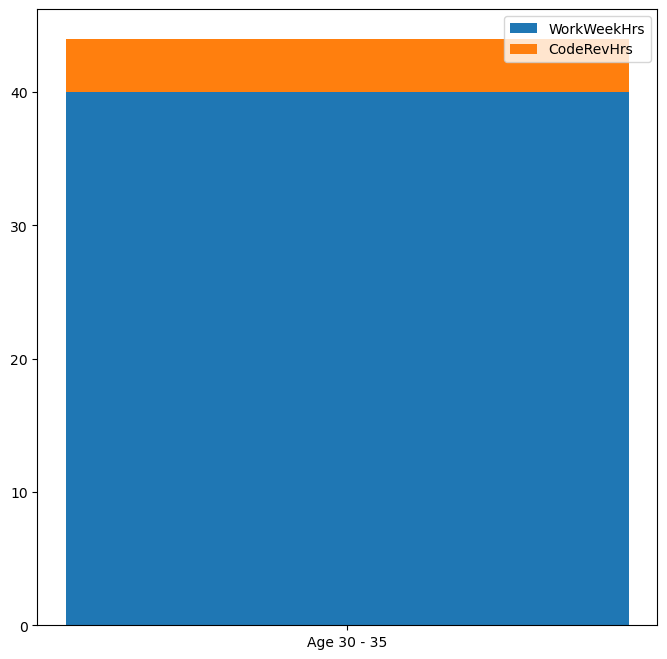

In [29]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 AND 35

"""
df = pd.read_sql_query(QUERY,conn)

work_week = df['WorkWeekHrs'].quantile(0.5)
code_rev = df['CodeRevHrs'].quantile(0.5)


plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots()

ax.bar('Age 30 - 35', work_week, label='WorkWeekHrs')
ax.bar('Age 30 - 35', code_rev, bottom=work_week, label='CodeRevHrs')
ax.legend()

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


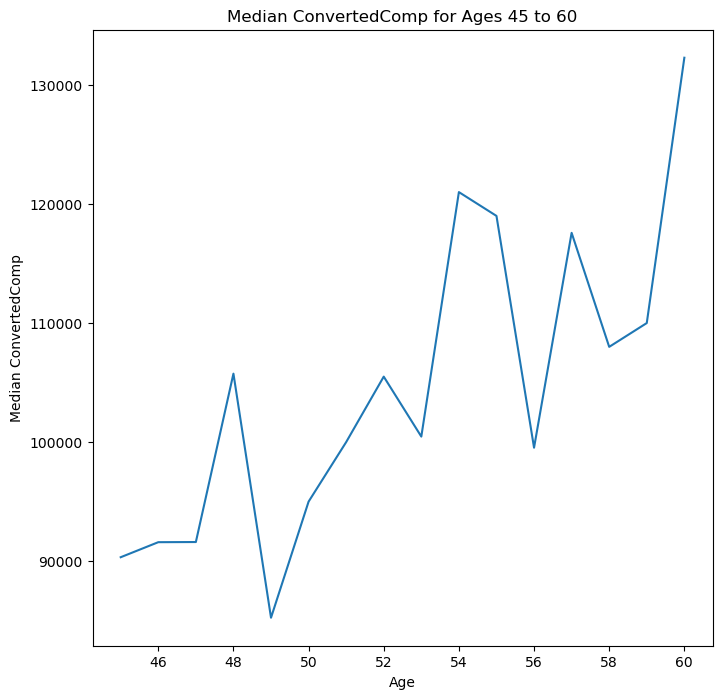

In [30]:
import seaborn as sns
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 45 AND 60

"""
df = pd.read_sql_query(QUERY,conn)

age_range = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

# Calculate the median ConvertedComp for each age
median_convertedcomp = age_range.groupby('Age')['ConvertedComp'].median()

# Plot the line chart
sns.lineplot(x=median_convertedcomp.index, y=median_convertedcomp.values)
plt.title('Median ConvertedComp for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


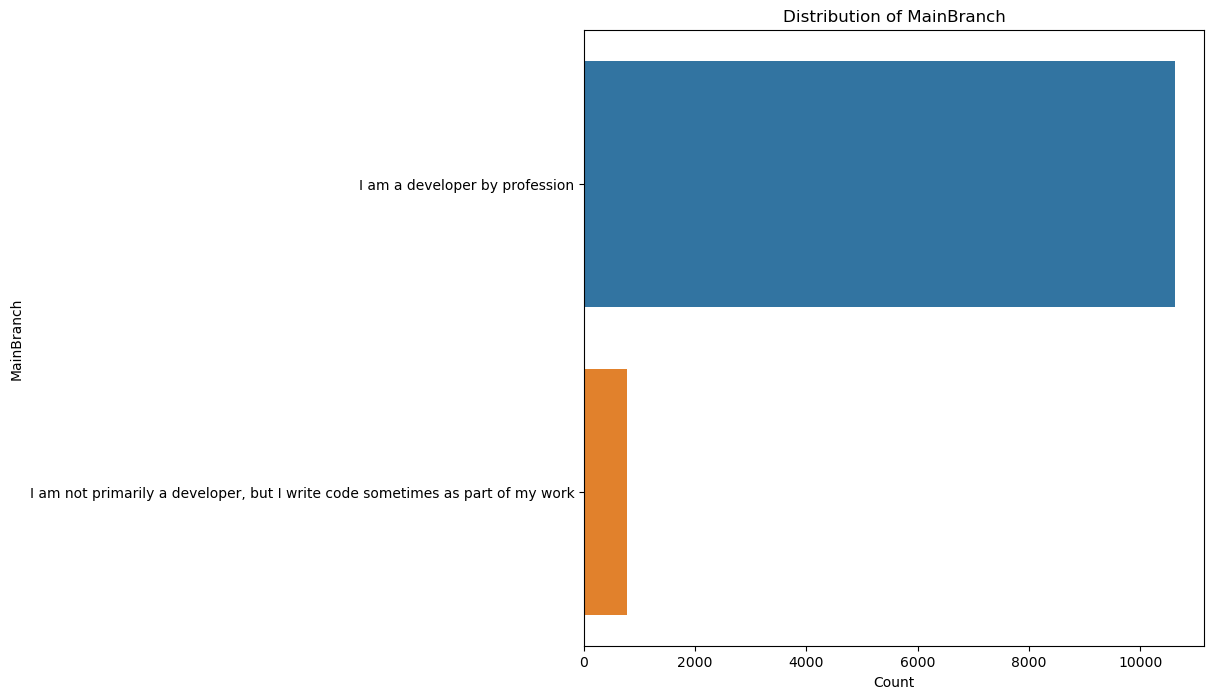

In [33]:
QUERY = """
SELECT MainBranch, COUNT(*) AS Frequency
FROM master
GROUP BY MainBranch

"""
df = pd.read_sql_query(QUERY,conn)

mainbranch_counts = df['MainBranch'].value_counts()

# Create a horizontal bar chart
sns.barplot(data = df, y = 'MainBranch', x = 'Frequency', orient = 'h')
plt.title('Distribution of MainBranch')
plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.show()

Close the database connection.


In [34]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
